In [ ]:
import pandas as pd

# Mount Google Drive if your file is stored there
from google.colab import drive
drive.mount('/content/drive')

# Provide the path to your Excel file
file_path = '/content/Telco.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path)

# Display the DataFrame
df


Mounted at /content/drive


,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,106.816666,-6.2,6897.8
7039,7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,106.816666,-6.2,2782.0
7040,7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,106.816666,-6.2,7228.0
7041,7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,106.816666,-6.2,3630.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   7043 non-null   int64  
 1   Tenure Months                 7043 non-null   int64  
 2   Location                      7043 non-null   object 
 3   Device Class                  7043 non-null   object 
 4   Games Product                 7043 non-null   object 
 5   Music Product                 7043 non-null   object 
 6   Education Product             7043 non-null   object 
 7   Call Center                   7043 non-null   object 
 8   Video Product                 7043 non-null   object 
 9   Use MyApp                     7043 non-null   object 
 10  Payment Method                7043 non-null   object 
 11  Monthly Purchase (Thou. IDR)  7043 non-null   float64
 12  Churn Label                   7043 non-null   object 
 13  Lon

In [ ]:
# Display data types of each column
column_types = df.dtypes
print(column_types)

Customer ID                       int64
Tenure Months                     int64
Location                         object
Device Class                     object
Games Product                    object
Music Product                    object
Education Product                object
Call Center                      object
Video Product                    object
Use MyApp                        object
Payment Method                   object
Monthly Purchase (Thou. IDR)    float64
Churn Label                      object
Longitude                       float64
Latitude                        float64
CLTV (Predicted Thou. IDR)      float64
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify object columns
object_columns = df.select_dtypes(include='object').columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Label encode each object column
for column in object_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the modified DataFrame
df

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,1,2,2,2,0,0,0,0,2,70.005,1,106.816666,-6.2,4210.7
1,1,2,1,0,0,0,0,0,0,0,3,91.910,1,106.816666,-6.2,3511.3
2,2,8,1,0,0,0,2,0,2,2,3,129.545,1,106.816666,-6.2,6983.6
3,3,28,1,0,0,0,2,1,2,2,3,136.240,1,106.816666,-6.2,6503.9
4,4,49,1,0,0,2,2,0,2,2,1,134.810,1,106.816666,-6.2,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,72,1,1,1,1,1,0,1,1,1,27.495,0,106.816666,-6.2,6897.8
7039,7039,24,1,2,2,0,2,1,2,2,2,110.240,0,106.816666,-6.2,2782.0
7040,7040,72,1,0,0,2,2,0,2,2,0,134.160,0,106.816666,-6.2,7228.0
7041,7041,11,1,2,2,0,0,0,0,0,3,38.480,0,106.816666,-6.2,3630.9


In [ ]:
from sklearn.preprocessing import PowerTransformer

numeric = ['Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)']
scaler_power = PowerTransformer(method='yeo-johnson')
df[numeric] = scaler_power.fit_transform(df[numeric])

In [ ]:
df

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,1,2,2,2,0,0,0,0,2,-0.342080,1,106.816666,-6.2,-1.003218
1,1,2,1,0,0,0,0,0,0,0,3,0.213999,1,106.816666,-6.2,-1.403434
2,2,8,1,0,0,0,2,0,2,2,3,1.147553,1,106.816666,-6.2,0.819000
3,3,28,1,0,0,0,2,1,2,2,3,1.311322,1,106.816666,-6.2,0.479924
4,4,49,1,0,0,2,2,0,2,2,1,1.276393,1,106.816666,-6.2,0.789236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,72,1,1,1,1,1,0,1,1,1,-1.465128,0,106.816666,-6.2,0.757685
7039,7039,24,1,2,2,0,2,1,2,2,2,0.671653,0,106.816666,-6.2,-1.789598
7040,7040,72,1,0,0,2,2,0,2,2,0,1.260508,0,106.816666,-6.2,0.995214
7041,7041,11,1,2,2,0,0,0,0,0,3,-1.167169,0,106.816666,-6.2,-1.336967


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Menentukan variabel target dan variabel prediktor numerik
target_variable = 'Churn Label'
numeric_predictors = ['Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)']

# Inisialisasi list untuk menyimpan hasil korelasi
correlations = []

# Looping untuk menghitung korelasi antara variabel target dan variabel prediktor numerik
for predictor in numeric_predictors:
    # Menghitung koefisien korelasi Pearson antara variabel target dan variabel prediktor
    correlation, p_value = pearsonr(df[predictor], df[target_variable])

    # Menentukan keputusan berpengaruh atau tidaknya variabel prediktor
    if abs(correlation) >= 0.5:
        significance = 'Pengaruh'
    else:
        significance = 'Tidak Pengaruh'

    # Menyimpan hasil korelasi
    correlation = {'Predictor': predictor, 'Correlation': correlation, 'P-Value': p_value, 'Significance': significance}
    correlations.append(correlation)

# Membuat dataframe dari hasil korelasi
correlations_df_num = pd.DataFrame(correlations)

# Menampilkan hasil korelasi
correlations_df_num

,Predictor,Correlation,P-Value,Significance
0,Monthly Purchase (Thou. IDR),0.195010,2.560756e-61,Tidak Pengaruh
1,CLTV (Predicted Thou. IDR),-0.127587,5.960318e-27,Tidak Pengaruh


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Menentukan variabel target dan variabel prediktor kategorik
target_variable = 'Churn Label'
categorical_predictors = ['Location', 'Device Class', 'Games Product', 'Music Product', 'Education Product', 'Call Center', 'Video Product', 'Use MyApp', 'Payment Method']

# Inisialisasi list untuk menyimpan hasil korelasi
correlations = []

# Looping untuk menghitung korelasi antara variabel target dan variabel prediktor kategorik
for predictor in categorical_predictors:
    # Membuat tabel kontingensi antara variabel target dan variabel prediktor
    contingency_table = pd.crosstab(df[predictor], df[target_variable])

    # Melakukan uji chi-square
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    # Menentukan keputusan berpengaruh atau tidaknya variabel prediktor
    if p_value < 0.05:
        significance = 'Pengaruh'
    else:
        significance = 'Tidak Pengaruh'

    # Menyimpan hasil korelasi
    correlation = {'Predictor': predictor, 'Chi-Square': chi2, 'P-Value': p_value, 'Significance': significance}
    correlations.append(correlation)

# Membuat dataframe dari hasil korelasi
correlations_df_cat = pd.DataFrame(correlations)

# Menampilkan hasil korelasi
correlations_df_cat

,Predictor,Chi-Square,P-Value,Significance
0,Location,0.478254,4.892143e-01,Tidak Pengaruh
1,Device Class,732.309590,9.571788e-160,Pengaruh
2,Games Product,849.998968,2.661150e-185,Pengaruh
3,Music Product,601.812790,2.079759e-131,Pengaruh
4,Education Product,558.419369,5.505219e-122,Pengaruh
5,Call Center,190.166842,2.923567e-43,Pengaruh
6,Video Product,374.203943,5.528994e-82,Pengaruh
7,Use MyApp,375.661479,2.667757e-82,Pengaruh
8,Payment Method,648.142327,3.682355e-140,Pengaruh


In [ ]:
from scipy.stats import spearmanr

# Perform Spearman rank correlation test
spearman_corr, p_value = spearmanr(df['Tenure Months'], df['Churn Label'])

# Display the results
print(f"Spearman Rank Correlation: {spearman_corr}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("The variables are significantly correlated (reject H0)")
else:
    print("There is no significant correlation between the variables (fail to reject H0)")

Spearman Rank Correlation: -0.3670618566861082
P-value: 1.404616769950862e-223
The variables are significantly correlated (reject H0)


In [ ]:
from scipy.stats import shapiro

# Specify the columns you want to test for normality
columns_to_test = ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)']

# Iterate through selected columns
for column in columns_to_test:
    # Perform Shapiro-Wilk test
    stat, p_value = shapiro(df[column])

    # Display the results
    print(f"Shapiro-Wilk test for normality on column '{column}':")
    print(f"Statistic: {stat}")
    print(f"P-value: {p_value}")

    # Check the p-value and provide interpretation
    alpha = 0.05
    if p_value > alpha:
        print("The data appears to be normally distributed (fail to reject H0)")
    else:
        print("The data does not appear to be normally distributed (reject H0)")

    print("\n")

Shapiro-Wilk test for normality on column 'Tenure Months':
Statistic: 0.9037514925003052
P-value: 0.0
The data does not appear to be normally distributed (reject H0)


Shapiro-Wilk test for normality on column 'Monthly Purchase (Thou. IDR)':
Statistic: 0.9177345633506775
P-value: 0.0
The data does not appear to be normally distributed (reject H0)


Shapiro-Wilk test for normality on column 'CLTV (Predicted Thou. IDR)':
Statistic: 0.967430591583252
P-value: 3.7985111818407505e-37
The data does not appear to be normally distributed (reject H0)




/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


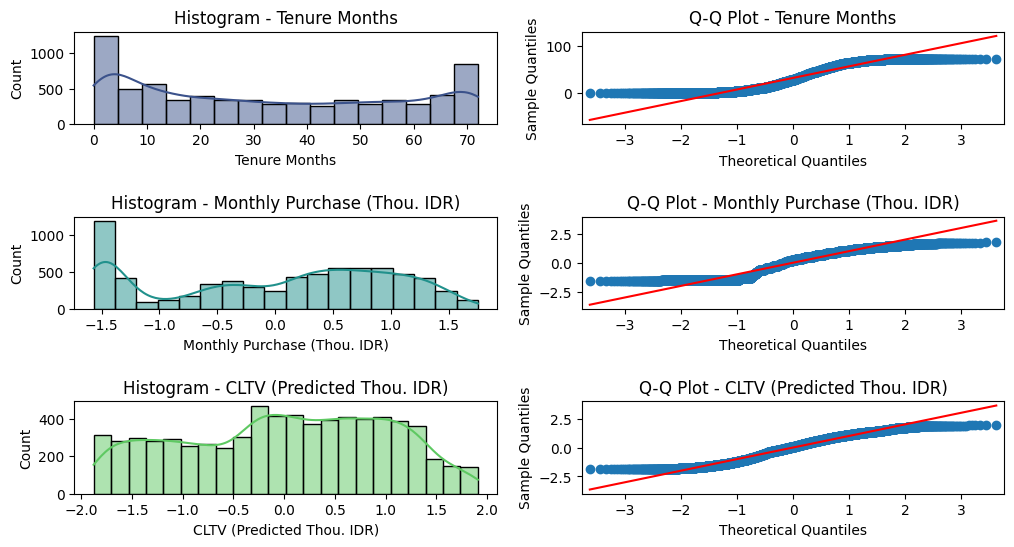

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the columns you want to visualize
columns_to_visualize = ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)']

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_visualize), ncols=2, figsize=(12, 2 * len(columns_to_visualize)))
plt.subplots_adjust(hspace=1)

# Set a gradient color palette
colors = sns.color_palette("viridis", len(columns_to_visualize))

# Iterate through selected columns
for i, column in enumerate(columns_to_visualize):
    # Histogram
    sns.histplot(df[column], kde=True, color=colors[i], ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram - {column}')

    # Q-Q Plot
    from statsmodels.graphics.gofplots import qqplot
    qqplot(df[column], line='s', color=colors[i], ax=axes[i, 1])
    axes[i, 1].set_title(f'Q-Q Plot - {column}')

plt.show()

In [ ]:
from scipy.stats import f_oneway

# Example data
churn_labels = df['Churn Label'].unique()

# Create a list of data for each group
groups_data = [df[df['Churn Label'] == label]['Monthly Purchase (Thou. IDR)'] for label in churn_labels]

# Perform ANOVA
f_statistic, p_value = f_oneway(*groups_data)

# Display the results
print(f"ANOVA F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

ANOVA F-statistic: 278.3469192460702
P-value: 2.5607560566721037e-61


The ANOVA tests the null hypothesis that the means of 'Monthly Purchase (Thou. IDR)' are the same across all groups defined by 'Churn Label'. The p-value is used to assess the statistical significance of the ANOVA test. If the p-value is below a chosen significance level (e.g., 0.05), you reject the null hypothesis, indicating that there are significant differences in the means between at least two groups.

In [ ]:
from scipy.stats import f_oneway

# Example data
churn_labels = df['Churn Label'].unique()

# Create a list of data for each group
groups_data_cltv = [df[df['Churn Label'] == label]['CLTV (Predicted Thou. IDR)'] for label in churn_labels]

# Perform ANOVA
f_statistic_cltv, p_value_cltv = f_oneway(*groups_data_cltv)

# Display the results
print(f"ANOVA F-statistic for CLTV: {f_statistic_cltv}")
print(f"P-value for CLTV: {p_value_cltv}")

ANOVA F-statistic for CLTV: 116.51280611252884
P-value for CLTV: 5.9603179468890825e-27


In [ ]:
churn_labels

array([1, 0])